# Supervised Learning Capstone Project - Tree Methods Focus 

## GOAL: Create a model to predict whether or not a customer will Churn .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

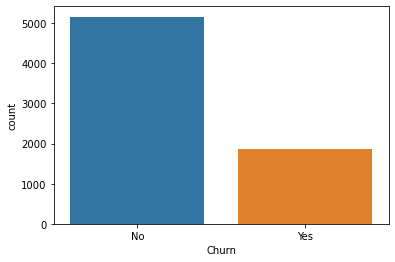

In [7]:
sns.countplot(x ='Churn', data = df)

**Distrbution of TotalCharges between Churn categories with Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

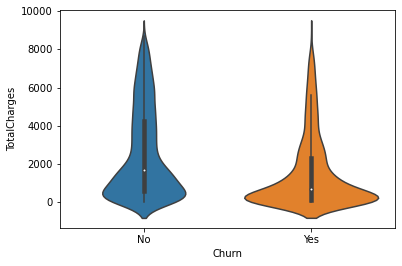

In [4]:
sns.violinplot(x= 'Churn', y = 'TotalCharges', data = df)

**Boxplot showing the distribution of TotalCharges per Contract type with a hue coloring based on the Churn class.**

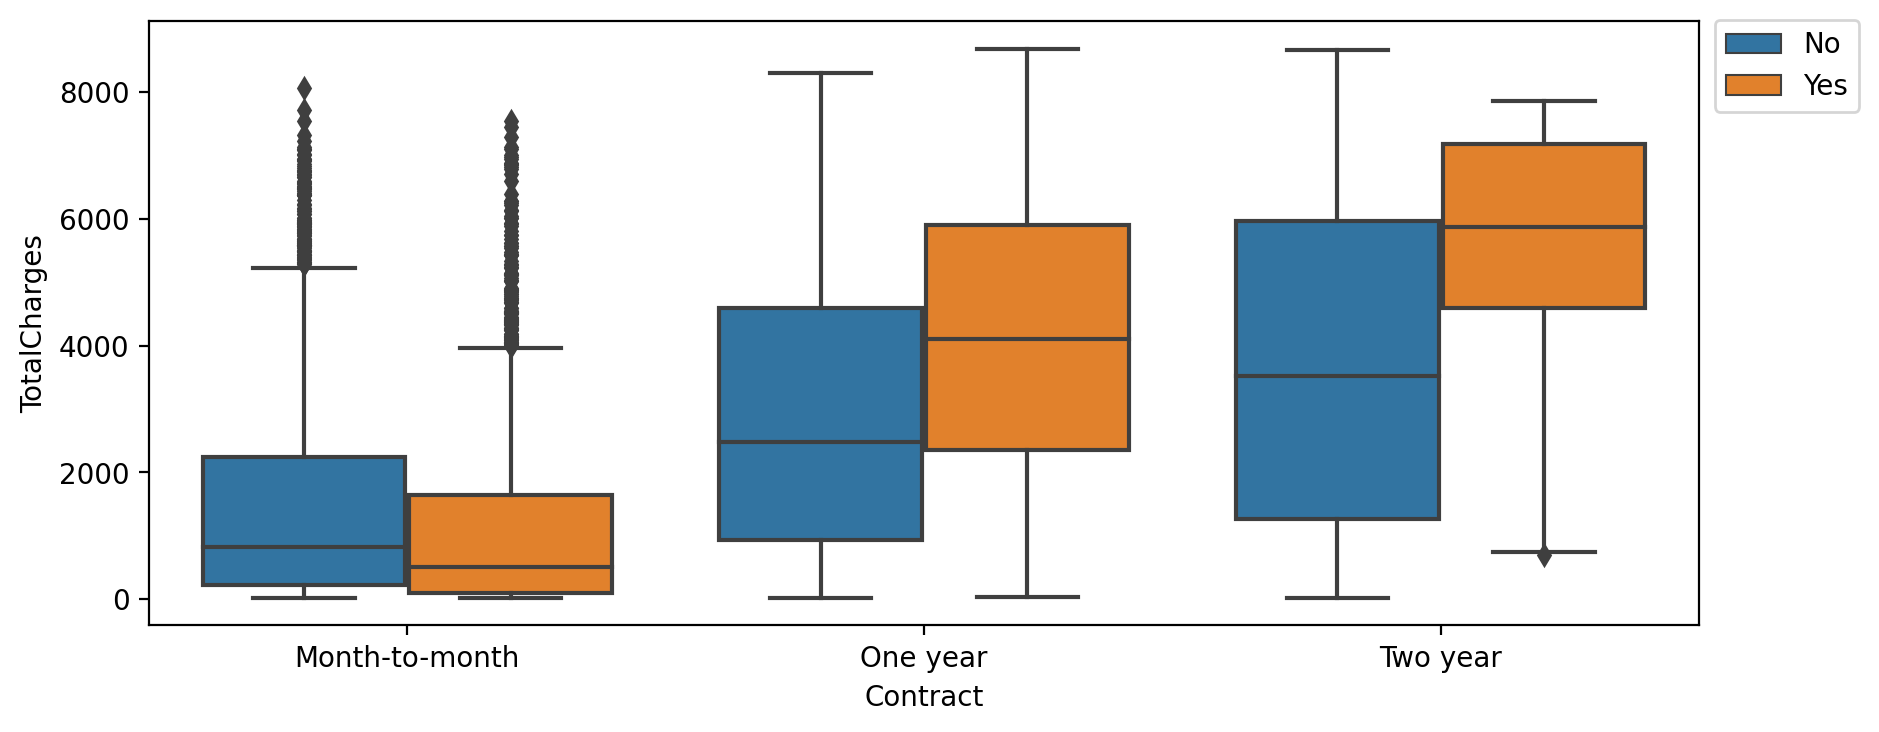

In [12]:
plt.figure(figsize=(10,4),dpi = 200)
sns.boxplot(x = 'Contract', y = 'TotalCharges', data = df, hue = 'Churn')
plt.legend(loc = (1.01,0.85))

**Bar plot showing the correlation of the following features to the class label.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [13]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [14]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

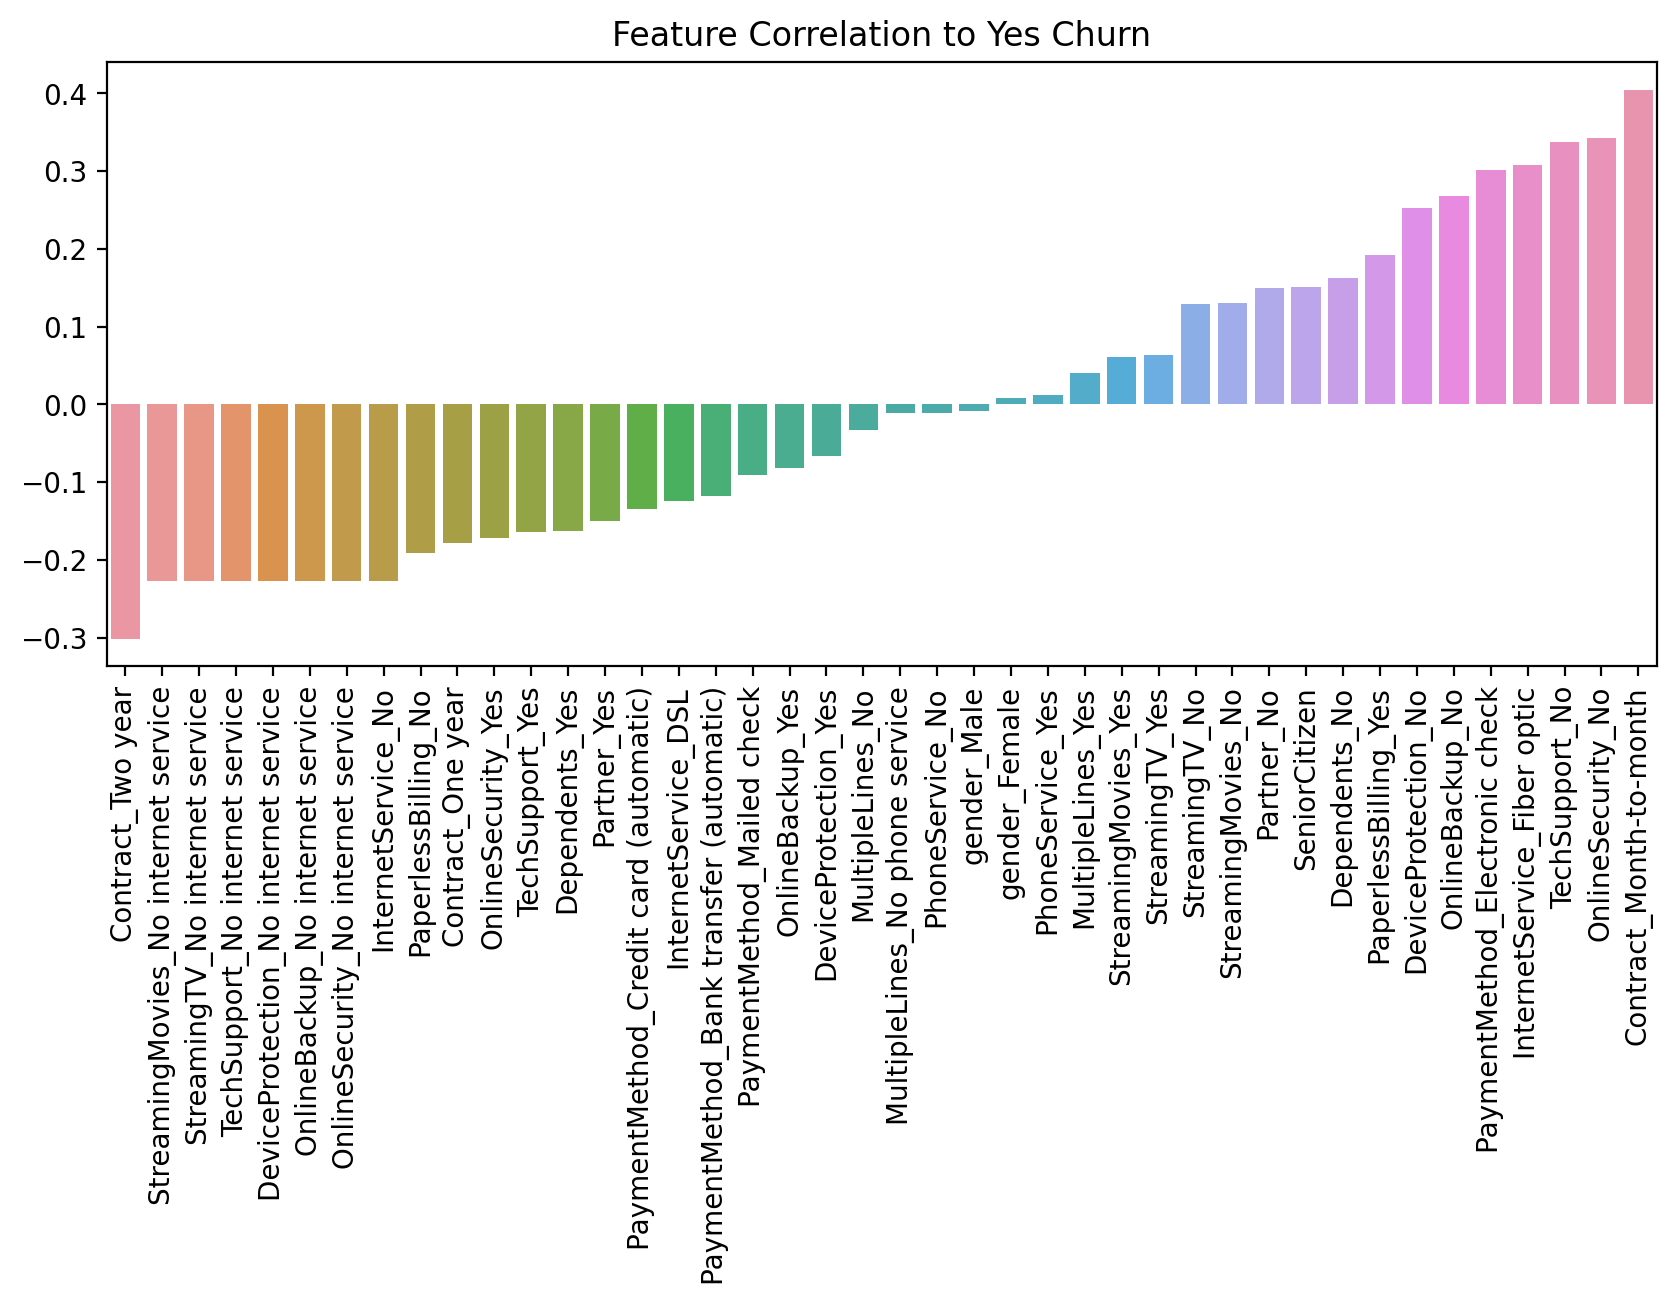

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**Contract types available.**

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

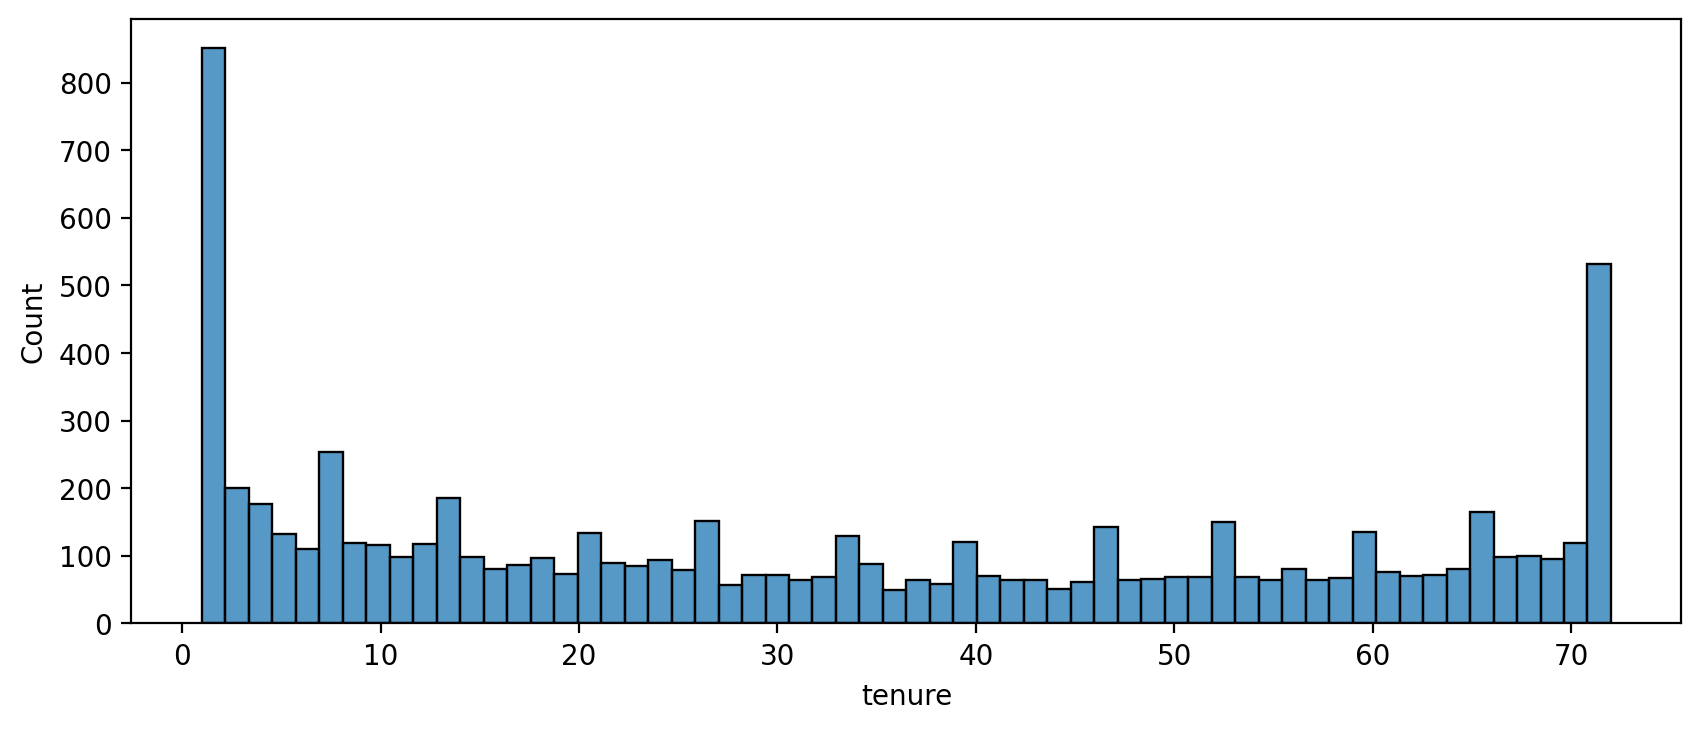

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

**Histograms separated by two additional features, Churn and Contract.**

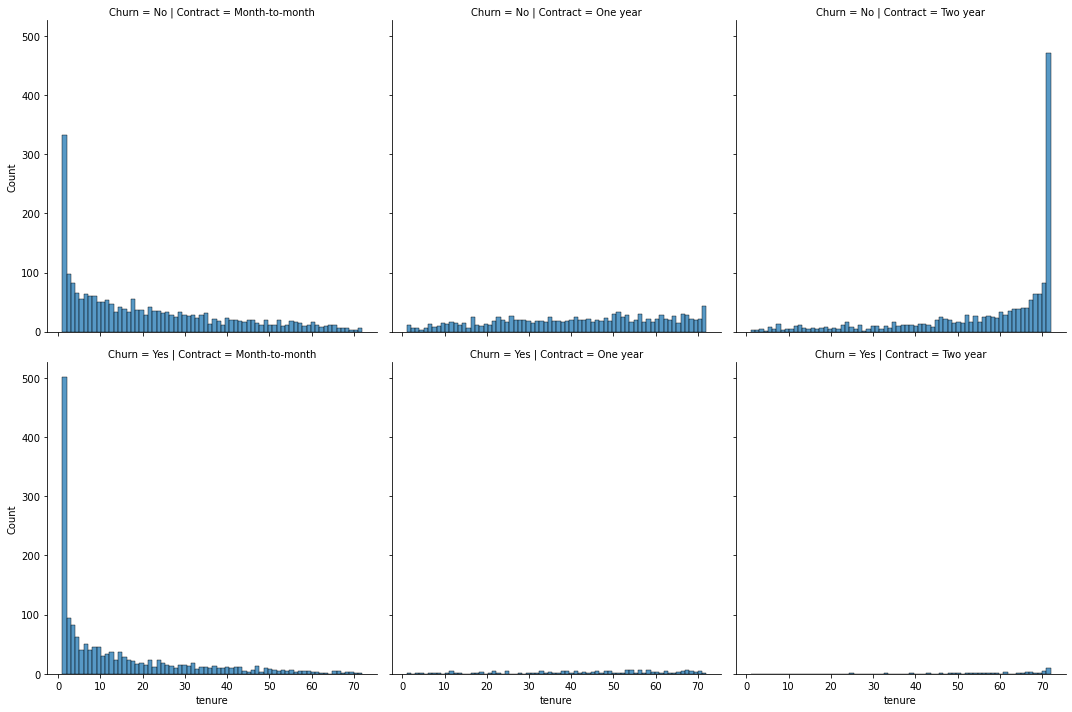

In [18]:
sns.displot(data=df, x = 'tenure', bins = 70, col = 'Contract', row = 'Churn' )

**Scatter plot of Total Charges versus Monthly Charges with hue Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

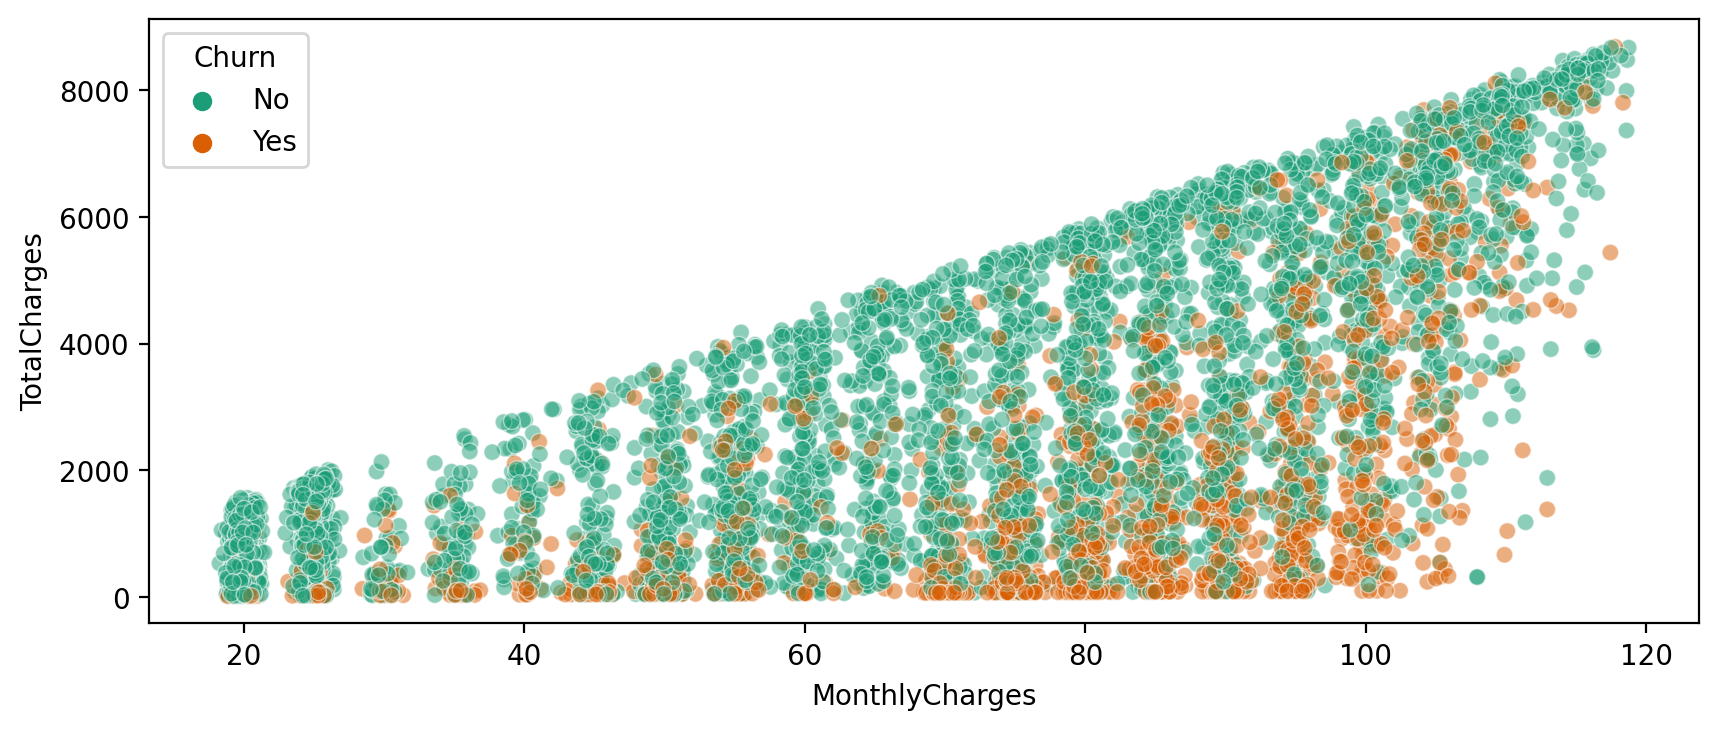

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

In [21]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [22]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [23]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [24]:
churn_rate.T['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [24]:
churn_rate.T.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72],
           dtype='int64', name='tenure')

**Plot showing churn rate per months of tenure.**

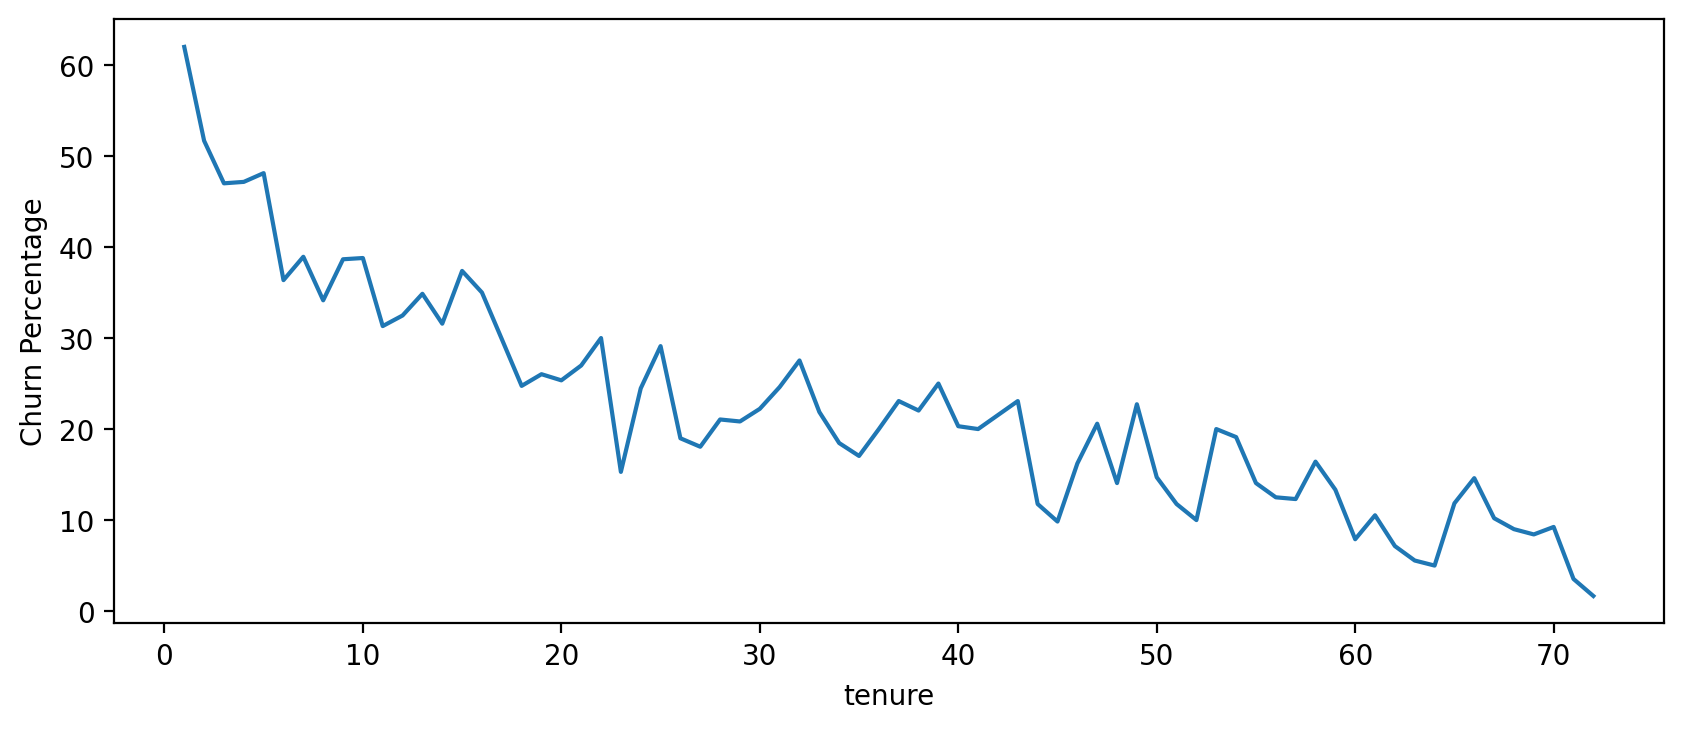

In [25]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
**Let's create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [26]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [27]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [28]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


**Scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

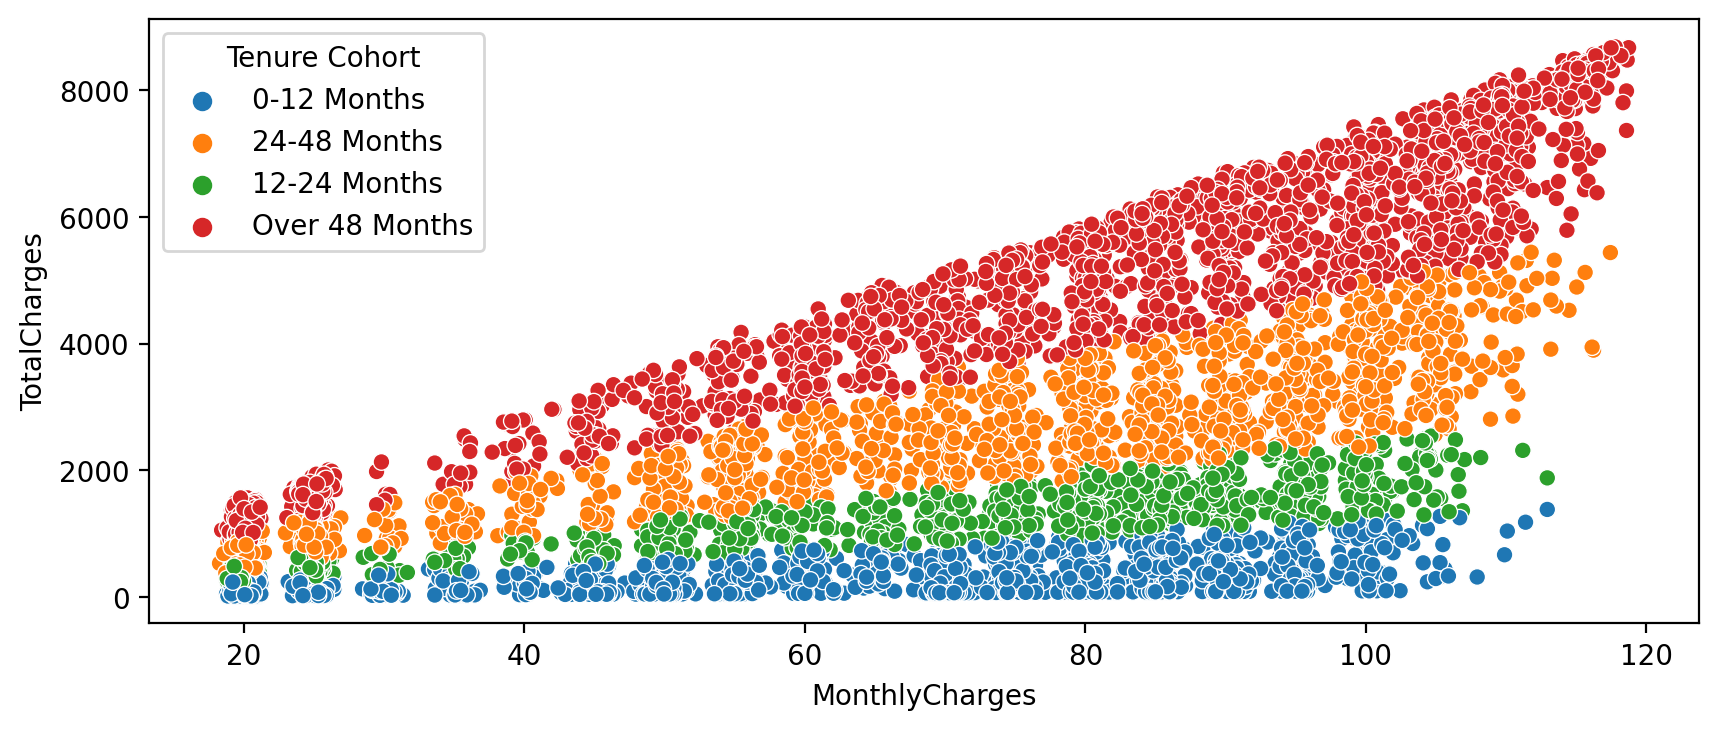

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', data = df)

**Count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

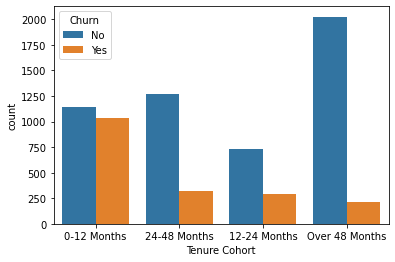

In [32]:
sns.countplot(x = 'Tenure Cohort', data = df, hue = 'Churn')

**Grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

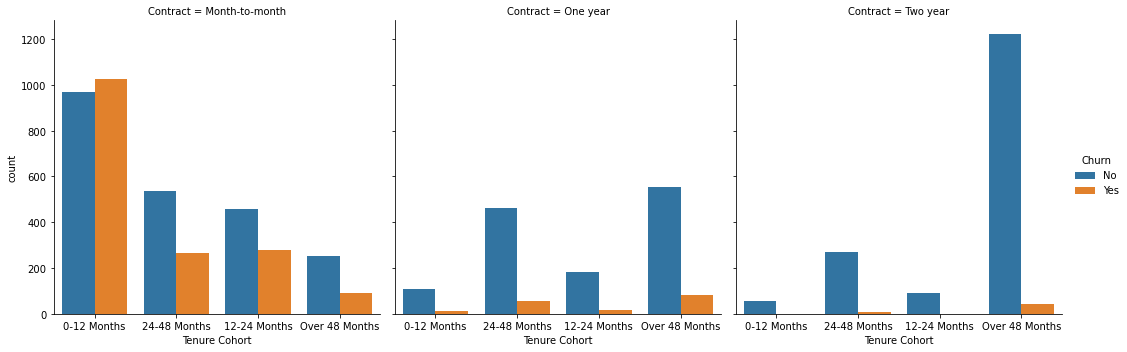

In [33]:
sns.catplot(data= df , x = 'Tenure Cohort' , hue = 'Churn', col='Contract', kind = 'count')

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**Separating out the data into X features and Y label. Creating dummy variables where necessary and droping features which are not useful.**

In [30]:
X = df.drop(['customerID','Churn'], axis =1)

In [31]:
X = pd.get_dummies(X,drop_first=True)

In [32]:
y = df['Churn']

**Performing a train test split, holding out 10% of the data for testing with random_state of 101.**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree = DecisionTreeClassifier(max_depth=6)

In [37]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [38]:
preds =tree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



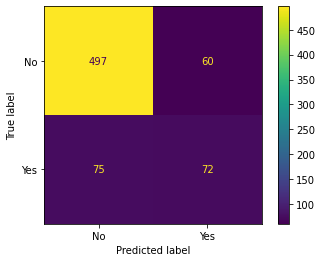

In [41]:
plot_confusion_matrix(tree,X_test, y_test)

In [46]:
tree.feature_importances_

array([0.01082504, 0.42391407, 0.04677747, 0.06350564, 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [42]:
imp_feat = pd.DataFrame(data = tree.feature_importances_, index = X.columns, columns=(['Feature Importance'])).sort_values('Feature Importance')

In [43]:
imp_feat['Feature Importance']

DeviceProtection_No internet service     0.000000
Tenure Cohort_12-24 Months               0.000000
PaymentMethod_Mailed check               0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaperlessBilling_Yes                     0.000000
StreamingMovies_Yes                      0.000000
StreamingMovies_No internet service      0.000000
StreamingTV_Yes                          0.000000
StreamingTV_No internet service          0.000000
TechSupport_No internet service          0.000000
DeviceProtection_Yes                     0.000000
Tenure Cohort_24-48 Months               0.000000
OnlineBackup_No internet service         0.000000
Tenure Cohort_Over 48 Months             0.000000
OnlineSecurity_No internet service       0.000000
Dependents_Yes                           0.000000
PhoneService_Yes                         0.000000
Partner_Yes                              0.000000
gender_Male                              0.001237
OnlineBackup_Yes                         0.005341


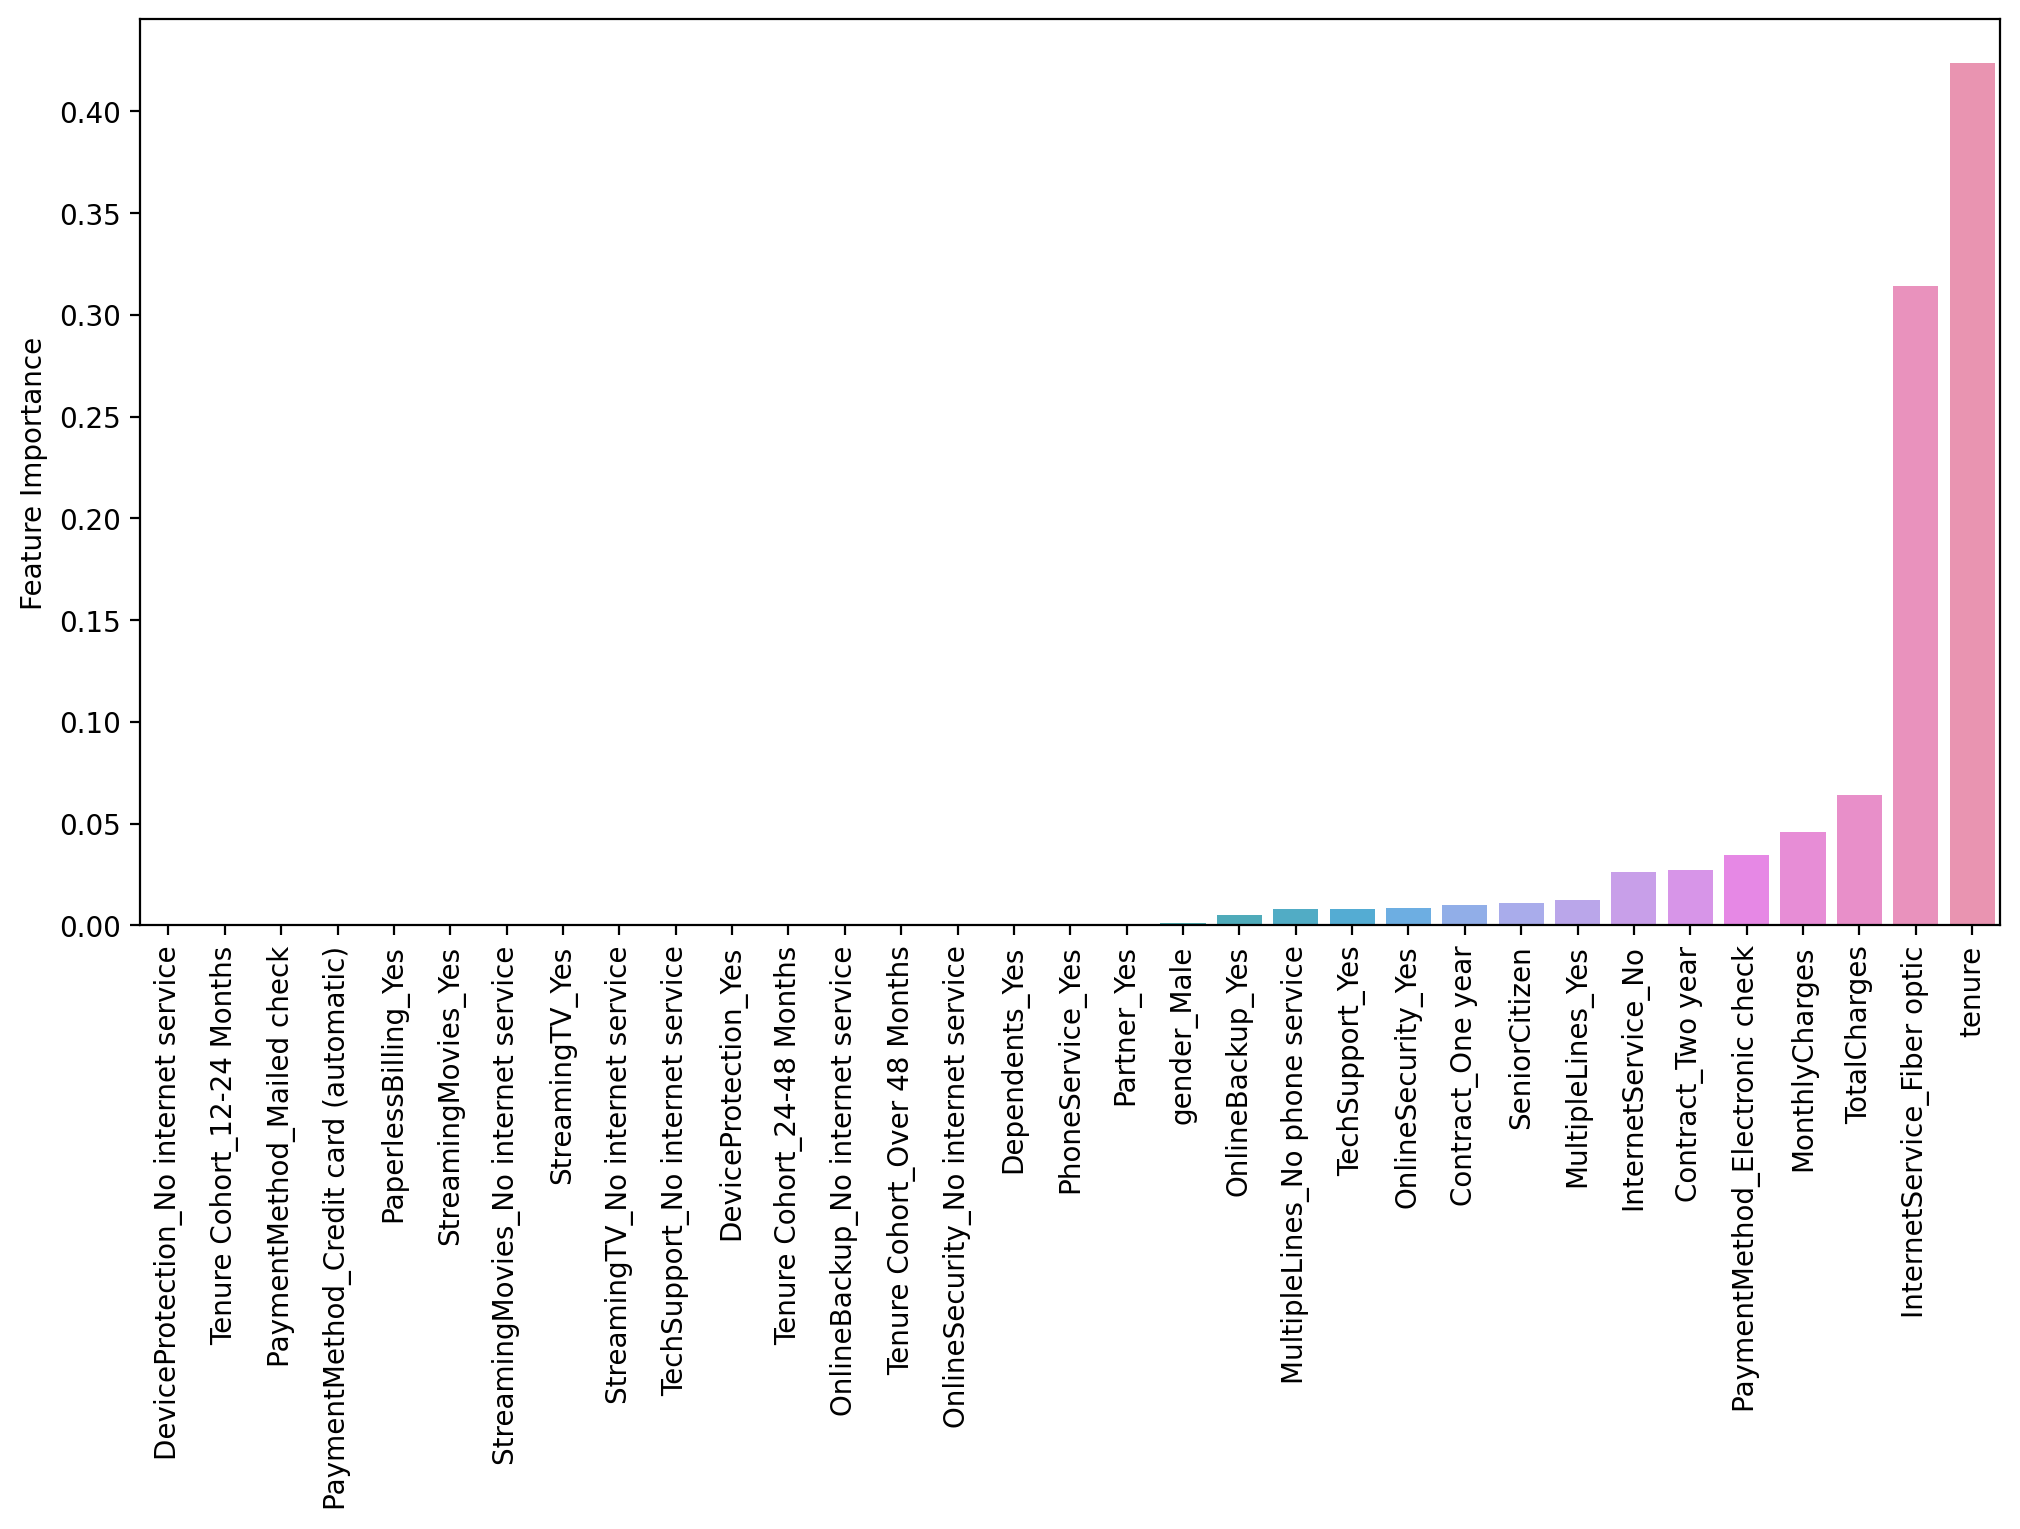

In [44]:
plt.figure(figsize=(12,6), dpi = 200)
sns.barplot(data  = imp_feat, x = imp_feat.index, y = imp_feat['Feature Importance'])
plt.xticks(rotation = 90);

In [45]:
from sklearn.tree import plot_tree

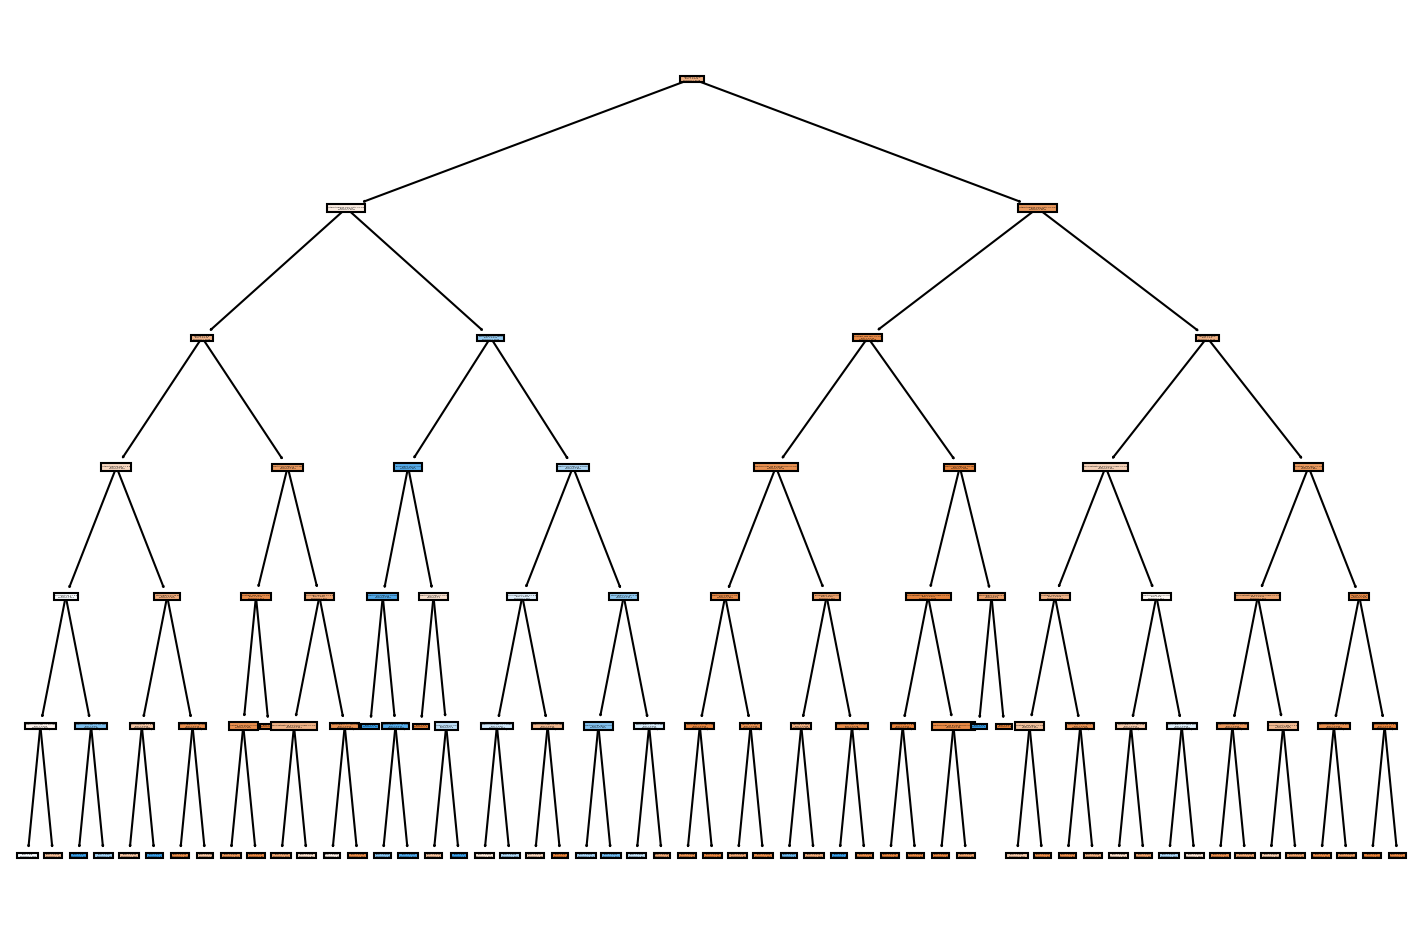

In [48]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree,filled=True,feature_names=X.columns);

## Random Forest


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=100)

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
preds = rf.predict(X_test)

In [53]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



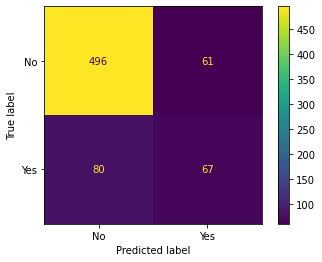

In [54]:
plot_confusion_matrix(rf,X_test, y_test)

## Boosted Trees

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier()

In [57]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [58]:
predict = ada.predict(X_test)

In [59]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



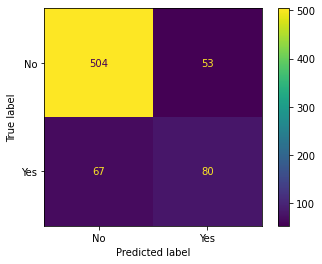

In [60]:
plot_confusion_matrix(ada,X_test, y_test)